In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_no_mean_SentenceBERT5w2H_CLASS.csv",low_memory=False)
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB,ADV_ADV,CLASS,Who,Where,When,What,Why,How,Additional information
0,23.182777,0.000000,8.168021,0.00000,3.787637,0.000000,0.000000,0.00000,1.747140,0.00000,...,0.0,0.0,entailment,0.696783,0.076060,1.0,0.505262,1.0,1.0,1.000000
1,22.942028,1.591551,2.134990,0.00000,0.000000,8.615627,0.000000,0.00000,6.468956,0.00000,...,0.0,0.0,entailment,0.762582,1.000000,1.0,0.944161,1.0,1.0,0.699488
2,14.880619,1.824592,3.687874,0.00000,5.383794,0.000000,3.665578,0.00000,1.199861,0.00000,...,0.0,0.0,contradiction,0.881357,0.265408,1.0,0.360803,1.0,1.0,1.000000
3,6.220228,0.000000,1.236711,0.00000,2.620311,0.000000,0.000000,0.00000,3.244059,0.00000,...,0.0,0.0,contradiction,0.153366,1.000000,1.0,0.358316,1.0,1.0,1.000000
4,12.571067,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450579,0.00000,...,0.0,0.0,neutral,0.919903,0.715984,1.0,0.224679,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.506134,3.235250,0.000000,0.00000,0.000000,5.424360,0.000000,0.00000,1.057925,1.00428,...,0.0,0.0,entailment,0.706643,0.210286,1.0,0.570392,1.0,1.0,1.000000
96,11.299096,0.000000,0.000000,0.00000,5.716955,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.0,0.0,entailment,0.894956,1.000000,1.0,0.830284,1.0,1.0,1.000000
97,5.297839,0.000000,5.138863,0.00000,0.000000,0.000000,0.000000,0.00000,1.224579,0.00000,...,0.0,0.0,contradiction,0.072305,1.000000,1.0,0.086890,1.0,1.0,1.000000
98,7.110450,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450452,0.00000,...,0.0,0.0,contradiction,0.655674,1.000000,1.0,0.357685,1.0,1.0,1.000000


In [3]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ,ADV_VERB,ADV_ADV,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.933630,1.420933,2.266566,0.487803,3.229856,1.398877,0.406870,0.277978,2.540163,0.193960,...,0.055996,0.299592,0.121411,0.712144,0.751508,0.923311,0.496864,0.908617,0.860216,0.870180
std,11.844145,2.745811,3.052742,1.744622,4.718448,3.249229,1.306758,1.370748,3.315508,0.646068,...,0.374244,1.608045,0.879950,0.254961,0.338036,0.233606,0.327958,0.259196,0.309860,0.293922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.072305,0.076060,0.187566,-0.011613,-0.009505,0.026425,-0.013459
25%,8.934640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.532159,0.360418,1.000000,0.216580,1.000000,1.000000,1.000000
50%,12.463868,0.000000,1.342973,0.000000,1.779214,0.000000,0.000000,0.000000,1.592038,0.000000,...,0.000000,0.000000,0.000000,0.751170,1.000000,1.000000,0.456016,1.000000,1.000000,1.000000
75%,19.832999,2.225710,3.601139,0.000000,3.795642,0.000000,0.000000,0.000000,3.260690,0.000000,...,0.000000,0.000000,0.000000,0.986195,1.000000,1.000000,0.807519,1.000000,1.000000,1.000000
max,69.723298,15.646733,19.075915,11.812714,25.429739,17.176733,8.096021,10.670149,17.773756,5.053692,...,3.442915,13.756932,7.558466,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


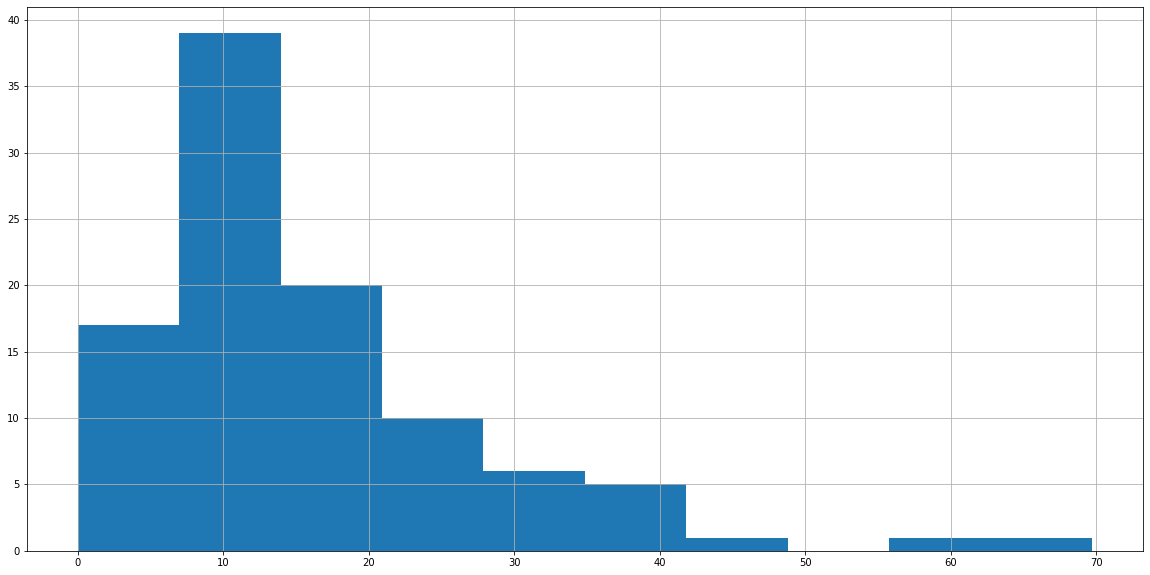

In [10]:
dataframe["NOUN_NOUN"].hist(figsize=(20,10))
plt.show()

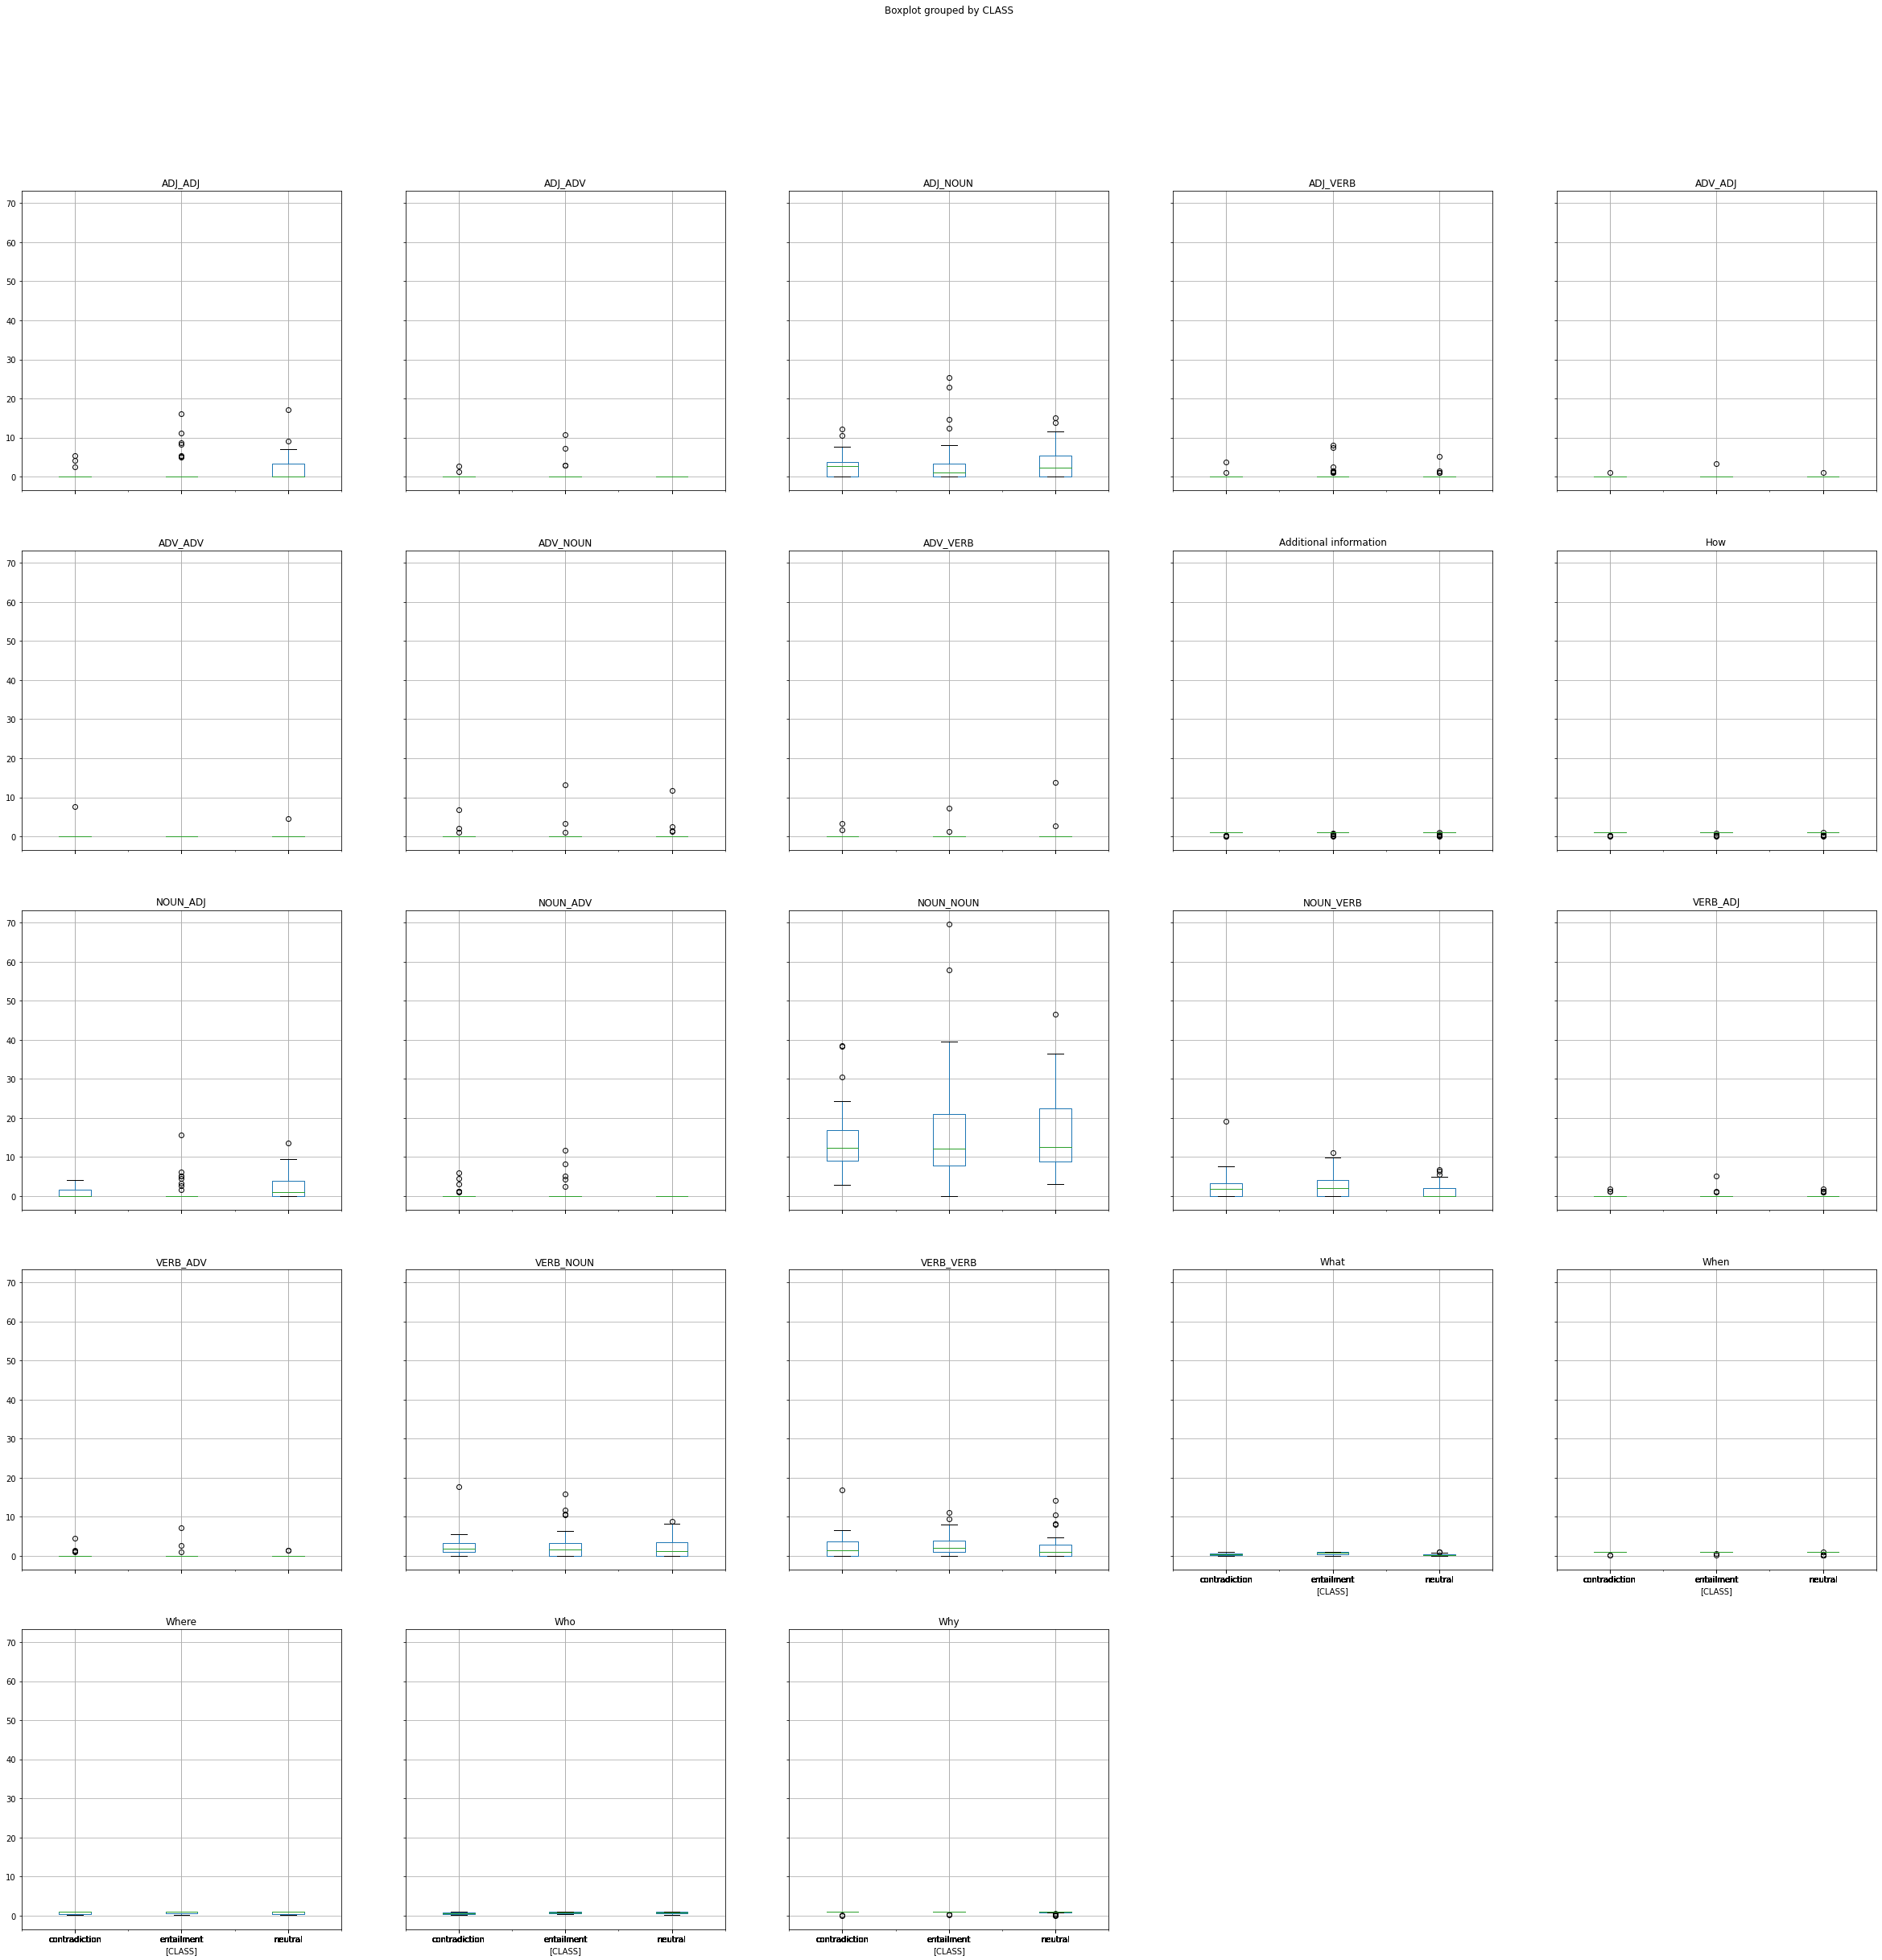

In [14]:
boxplot = dataframe.boxplot(by="CLASS",figsize=(40,40)) 

In [6]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [7]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [8]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_112533/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_112533/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 23)

In [9]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [11]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [12]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
model.decision_function(X)

array([[ 2.52383959e-01,  7.21944323e-01, -9.74328282e-01],
       [-1.35051699e+00,  1.32036165e+00,  3.01553334e-02],
       [-3.33316816e-01,  3.32255584e-01,  1.06123171e-03],
       [ 1.39294293e-01,  3.00496304e-02, -1.69343923e-01],
       [-1.07150885e-01,  1.97635789e-01, -9.04849042e-02],
       [ 3.92350400e-01,  3.65366602e-01, -7.57717002e-01],
       [-1.26322895e-01,  4.09223673e-02,  8.54005278e-02],
       [-7.79026649e-01,  8.39448529e-01, -6.04218807e-02],
       [-1.93505670e-01, -4.84551921e-01,  6.78057591e-01],
       [ 1.08907260e-01,  4.17985541e-01, -5.26892801e-01],
       [-7.32988621e-01, -3.48051544e-02,  7.67793776e-01],
       [ 1.94767076e-03,  2.16235417e-01, -2.18183088e-01],
       [-3.91780986e-01,  4.17768403e-01, -2.59874164e-02],
       [ 3.64820528e-01,  1.71918570e-01, -5.36739098e-01],
       [-2.78020490e-01, -6.78069108e-01,  9.56089598e-01],
       [-7.47697133e-02,  1.64679008e-01, -8.99092945e-02],
       [-1.05319296e+00,  1.59265410e+00

In [14]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV',
 'Who','Where','When','What','Why','How','Additional information']

In [15]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [16]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [17]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  3 NOUN_ADV 16 Who
Entailment  19 What 1 NOUN_ADJ
Neutral  1 NOUN_ADJ 19 What


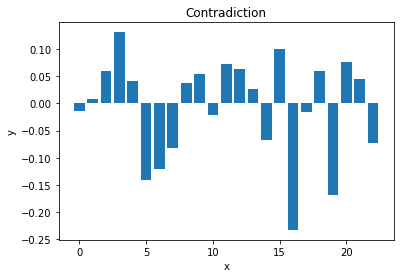

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,23,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

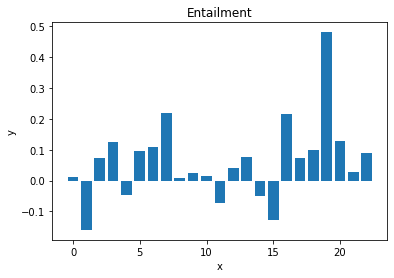

In [19]:
x_v = np.arange(0,23,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

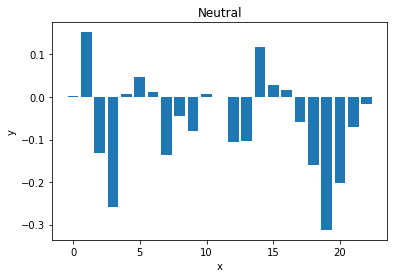

In [20]:
x_v = np.arange(0,23,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [21]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'contradiction' 'neutral' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'contradiction' 'entailment' 'contradiction' 'neutral'
 'entailment' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'entailment' 'entailment' 'neutral' 'entailment'
 'contradiction' 'neutral' 'entailment' 'entailment' 'contradiction'
 'entailment' 'entailment' 'entailment' 'entailment' 'neutral' 'neutral'
 'entailment' 'neutral' 'neutral' 'entailment' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'neutral' 'entailment'
 'contradiction' 'entailment' 'neutral' 'neutral' 'neutral' 'entailment'
 'entailment' 'entailment' 

In [22]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [23]:
X

array([[23.18277657,  0.        ,  8.16802084, ...,  1.        ,
         1.        ,  1.        ],
       [22.94202816,  1.59155118,  2.13499045, ...,  1.        ,
         1.        ,  0.6994884 ],
       [14.88061917,  1.82459164,  3.68787432, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [ 5.29783893,  0.        ,  5.13886273, ...,  1.        ,
         1.        ,  1.        ],
       [ 7.11044979,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ],
       [12.45881259,  0.        ,  0.        , ...,  1.        ,
         1.        ,  1.        ]])

In [24]:
model.score(X,y)

0.67

In [25]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [26]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.422222 (0.155556)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [27]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.6


In [28]:
print(confusion_matrix(Y_validation, predictions))

[[2 1 0]
 [0 1 1]
 [1 1 3]]


In [29]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.67      0.67      0.67         3
   entailment       0.33      0.50      0.40         2
      neutral       0.75      0.60      0.67         5

     accuracy                           0.60        10
    macro avg       0.58      0.59      0.58        10
 weighted avg       0.64      0.60      0.61        10



In [30]:
#X_new = pd.DataFrame()
#model.predict(X_new)